In [102]:
import numpy as np
import sympy as sy
from scipy.misc import derivative as deriv
from matplotlib import pyplot as plt

# Problem 1

In [2]:
def goldenratio(f, a,b,niter):
    i=0
    anew=a
    bnew=b
    rho=0.5*(3-np.sqrt(5))
    while i<niter:
        a=anew
        b=bnew
        aprime=a+rho*(b-a)
        bprime=a+(1-rho)*(b-a)
        if f(aprime)>f(bprime):
            anew=aprime
        if f(aprime)<=f(bprime):
            bnew=bprime
        i+=1
    return (anew+bnew)/2

In [6]:
error=1
tol=0.001
niter=0
while error>tol:
    niter+=1
    error=abs(goldenratio(lambda x:np.exp(x)-4*x,0,3,niter)-np.log(4))
niter, error

(13, 0.00071614434567845997)

# Problem 2

In [74]:
def bisect(f,a,b,niter):
    i=0
    anew=a
    bnew=b
    x=sy.symbols('x')
    fprime=sy.diff(f(x),x)
    while i<niter:
        a=anew
        b=bnew
        mid=(a+b)/2
        if fprime.evalf(subs={x:mid})>0:
            bnew=mid
        if fprime.evalf(subs={x:mid})<0:
            anew=mid
        if fprime.evalf(subs={x:mid})==0:
            anew=mid
            bnew=mid
        i+=1
    return (anew+bnew)/2

In [76]:
bisect(lambda x:sy.exp(x)-4*x,0,3,100)

1.3862943611198908

# Problem 3

In [88]:
def newton(f, fprime, f2prime, x0):
    xnew=x0
    x=3*x0
    tol=1e-14
    maxiter=2000
    i=0
    while abs((xnew-x))>tol and i<maxiter:
        x=xnew
        xnew=x-fprime(x)/f2prime(x)
        i+=1
    return x

In [97]:
f=lambda x:x**2+np.sin(5*x)
fprime=lambda x: 2*x+5*np.cos(5*x)
f2prime=lambda x: 2-25*np.sin(5*x)
newton(f,fprime,f2prime,1.4)

0.8712810830760791

# Problem 4

In [100]:
def secant(f, fprime, x0,x1):
    x=x1
    xold=x0
    tol=1e-14
    maxiter=2000
    i=0
    while abs((xold-x))>tol and i<maxiter:
        xnew=x-fprime(x)*(x-xold)/(fprime(x)-fprime(xold))
        x=xnew
        xold=x
        i+=1
    return xnew

In [101]:
g=lambda x: x**2+np.sin(x)+np.sin(10*x)
gprime=lambda x: 2*x+np.cos(x)+10*np.cos(10*x)
secant(g,gprime,0,-1)

-0.5275674878942771

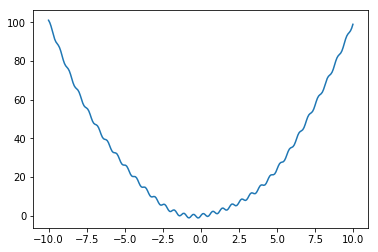

In [103]:
x=np.linspace(-10,10,250)
plt.plot(x, g(x))
plt.show()

# Problem 5

In [104]:
def backtrack(f, df, x0, p, alpha, rho, c):
    x=x0
    while f(x+alpha*p)>f(x)+c*alpha*np.dot(df.T,p):
        alpha=alpha*rho
    return alpha